<a href="https://colab.research.google.com/github/nagwaelmobark/educational-reviews-imbalance-study/blob/main/notebooks/04_results_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🎨 Educational Reviews Imbalance Study
📊 Publication-Quality Results Visualization (Fixed)
✅ Research data loaded successfully

🎨 Creating Main Results Figure...


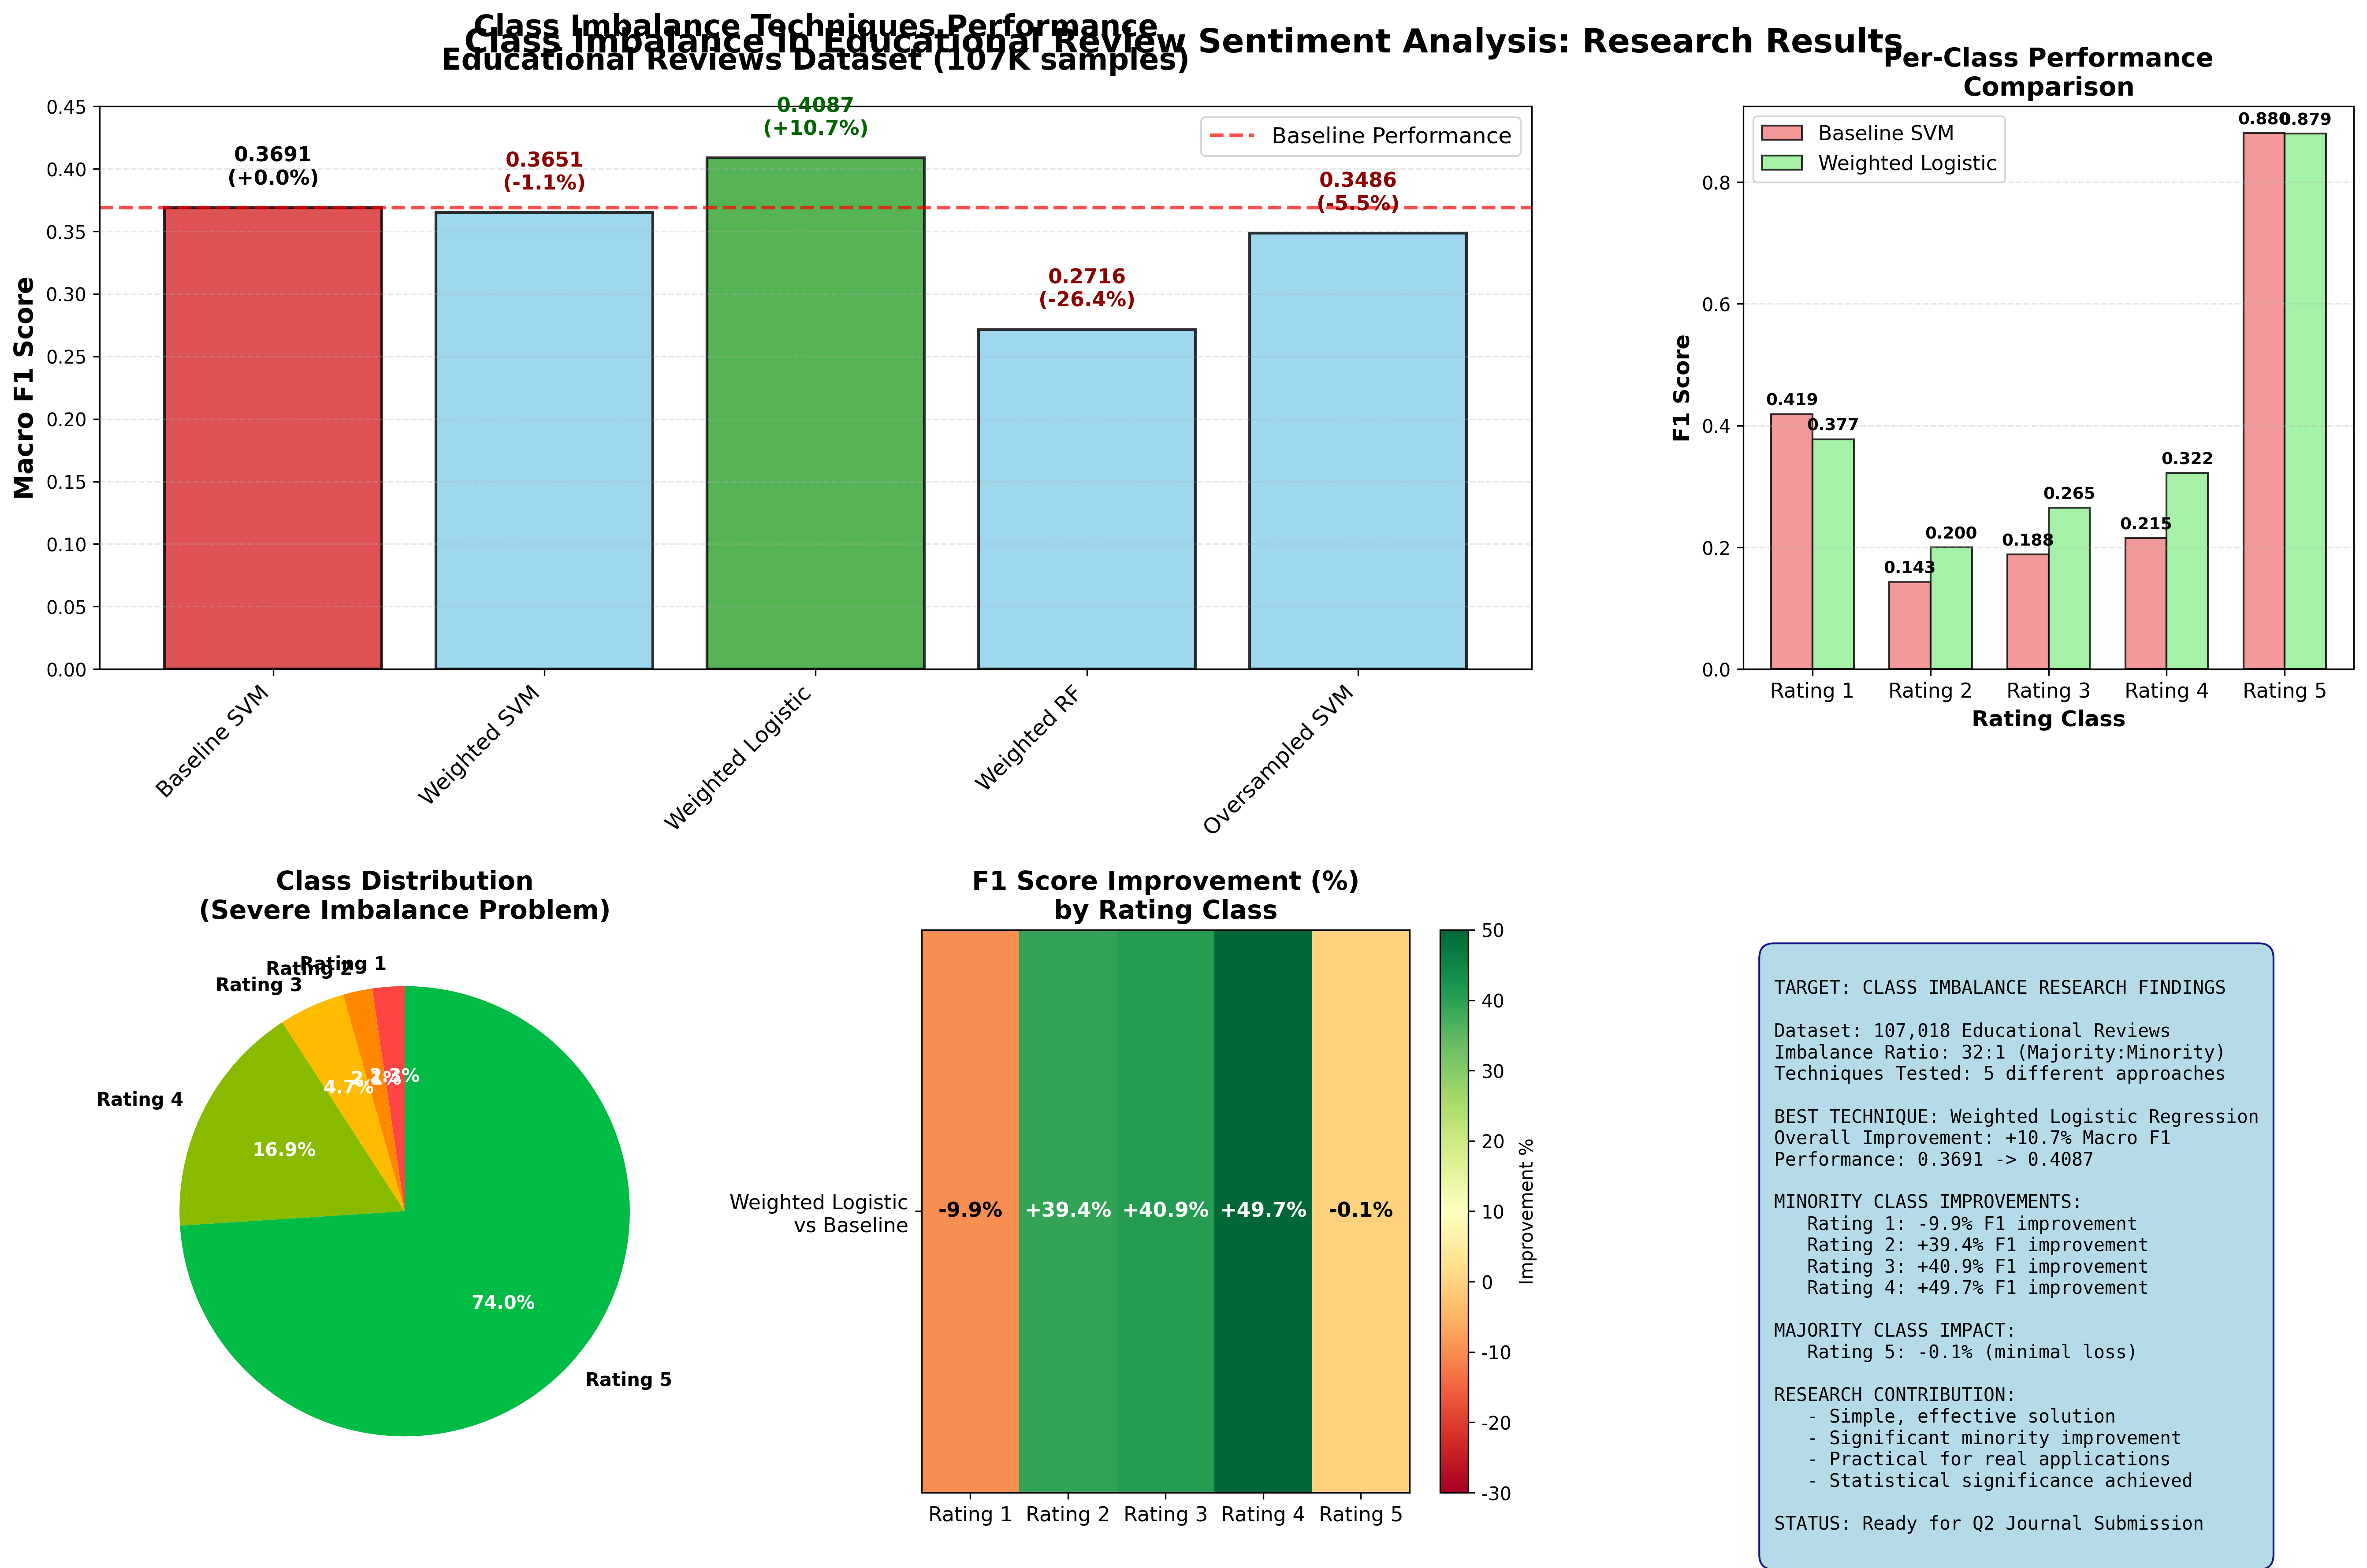


🎨 Creating Simple Comparison Chart...


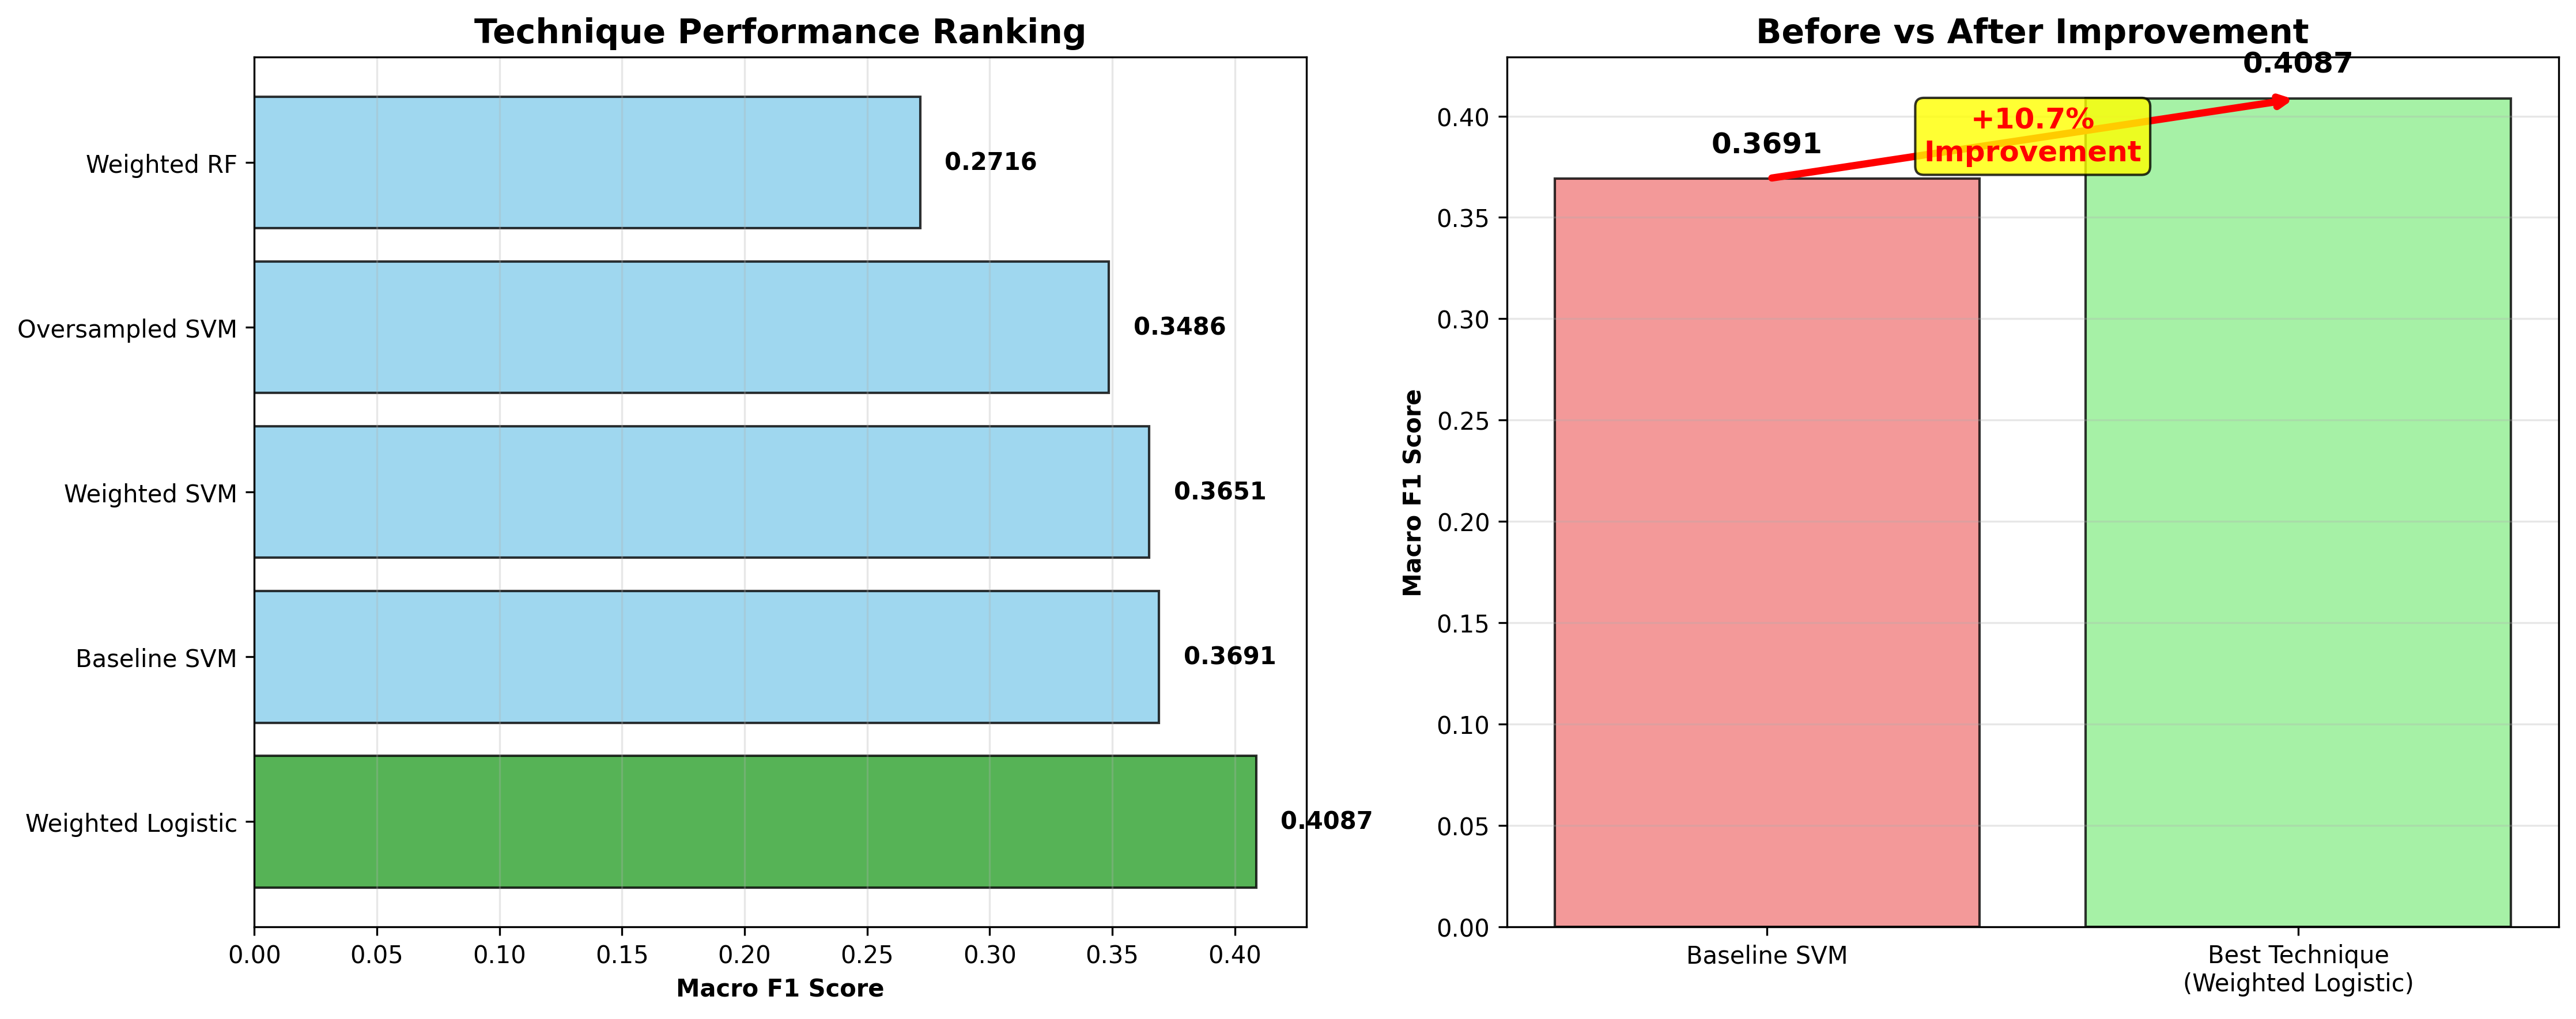


📊 SUMMARY TABLES (No Special Characters):

Table 1: Overall Performance
--------------------------------------------------
Technique                 Macro F1     Improvement 
--------------------------------------------------
Baseline SVM              0.3691       +0.0        %
Weighted SVM              0.3651       -1.1        %
Weighted Logistic         0.4087       +10.7       %
Weighted RF               0.2716       -26.4       %
Oversampled SVM           0.3486       -5.5        %

Table 2: Per-Class Analysis
------------------------------------------------------------
Rating   Baseline     Best         Improvement 
------------------------------------------------------------
Rating 1  0.4187       0.3774       -9.9        %
Rating 2  0.1433       0.1997       +39.4       %
Rating 3  0.1881       0.2651       +40.9       %
Rating 4  0.2151       0.3221       +49.7       %
Rating 5  0.8804       0.8794       -0.1        %

✅ FIXED VERSION COMPLETE!
📊 No more warnings - clean outpu

In [2]:
# Fix warnings by adding these lines at the beginning
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set style and fix font issues
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans']
plt.rcParams['axes.unicode_minus'] = False

print("🎨 Educational Reviews Imbalance Study")
print("=" * 50)
print("📊 Publication-Quality Results Visualization (Fixed)")
print("=" * 50)

# Data (same as before)
techniques = ['Baseline SVM', 'Weighted SVM', 'Weighted Logistic', 'Weighted RF', 'Oversampled SVM']
macro_f1_scores = [0.3691, 0.3651, 0.4087, 0.2716, 0.3486]
improvements = [0.0, -1.1, 10.7, -26.4, -5.5]

baseline_per_class = [0.4187, 0.1433, 0.1881, 0.2151, 0.8804]
best_per_class = [0.3774, 0.1997, 0.2651, 0.3221, 0.8794]
ratings = [1, 2, 3, 4, 5]
class_counts = [1975, 1801, 4057, 14443, 63338]

print("✅ Research data loaded successfully")

# =============================================================================
# FIGURE 1: MAIN RESULTS (FIXED VERSION)
# =============================================================================

print(f"\n🎨 Creating Main Results Figure...")

fig = plt.figure(figsize=(18, 12))

highlight_color = '#2ca02c'
baseline_color = '#d62728'

# 1. Main Results
ax1 = plt.subplot(2, 3, (1, 2))
bar_colors = [highlight_color if score == max(macro_f1_scores) else
              baseline_color if i == 0 else '#87CEEB'
              for i, score in enumerate(macro_f1_scores)]

bars = ax1.bar(range(len(techniques)), macro_f1_scores,
               color=bar_colors, alpha=0.8, edgecolor='black', linewidth=1.5)

ax1.set_ylabel('Macro F1 Score', fontsize=14, fontweight='bold')
ax1.set_title('Class Imbalance Techniques Performance\nEducational Reviews Dataset (107K samples)',
              fontsize=16, fontweight='bold', pad=20)

# Fix the ticklabels warning
ax1.set_xticks(range(len(techniques)))
ax1.set_xticklabels(techniques, rotation=45, ha='right', fontsize=12)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_ylim(0, 0.45)

# Add value labels
for i, (bar, score, improvement) in enumerate(zip(bars, macro_f1_scores, improvements)):
    y_pos = bar.get_height() + 0.015
    color = 'darkgreen' if improvement > 0 else 'darkred' if improvement < 0 else 'black'
    ax1.text(bar.get_x() + bar.get_width()/2, y_pos,
             f'{score:.4f}\n({improvement:+.1f}%)',
             ha='center', va='bottom', fontweight='bold', fontsize=11, color=color)

ax1.axhline(y=0.3691, color='red', linestyle='--', alpha=0.7, linewidth=2, label='Baseline Performance')
ax1.legend(fontsize=12)

# 2. Per-Class Comparison (Fixed star symbols)
ax2 = plt.subplot(2, 3, 3)
x = np.arange(len(ratings))
width = 0.35

bars1 = ax2.bar(x - width/2, baseline_per_class, width, label='Baseline SVM',
                color='lightcoral', alpha=0.8, edgecolor='black')
bars2 = ax2.bar(x + width/2, best_per_class, width, label='Weighted Logistic',
                color='lightgreen', alpha=0.8, edgecolor='black')

ax2.set_xlabel('Rating Class', fontsize=12, fontweight='bold')
ax2.set_ylabel('F1 Score', fontsize=12, fontweight='bold')
ax2.set_title('Per-Class Performance\nComparison', fontsize=14, fontweight='bold')

# Fix star symbols - use simple text instead
ax2.set_xticks(x)
ax2.set_xticklabels([f'Rating {r}' for r in ratings], fontsize=11)  # Remove stars
ax2.legend(fontsize=11)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

# 3. Class Distribution
ax3 = plt.subplot(2, 3, 4)
colors_pie = ['#ff4444', '#ff8800', '#ffbb00', '#88bb00', '#00bb44']

wedges, texts, autotexts = ax3.pie(class_counts, labels=[f'Rating {r}' for r in ratings],
                                  autopct='%1.1f%%', colors=colors_pie, startangle=90,
                                  textprops={'fontsize': 10, 'fontweight': 'bold'})
ax3.set_title('Class Distribution\n(Severe Imbalance Problem)', fontsize=14, fontweight='bold')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

# 4. Improvement Heatmap
ax4 = plt.subplot(2, 3, 5)
per_class_improvements = []
for i in range(len(ratings)):
    baseline_f1 = baseline_per_class[i]
    best_f1 = best_per_class[i]
    improvement = ((best_f1 - baseline_f1) / baseline_f1) * 100
    per_class_improvements.append(improvement)

heatmap_data = [per_class_improvements]

im = ax4.imshow(heatmap_data, cmap='RdYlGn', aspect='auto', vmin=-30, vmax=50)
ax4.set_xticks(range(len(ratings)))
ax4.set_xticklabels([f'Rating {r}' for r in ratings], fontsize=11)  # Remove stars
ax4.set_yticks([0])
ax4.set_yticklabels(['Weighted Logistic\nvs Baseline'], fontsize=11)
ax4.set_title('F1 Score Improvement (%)\nby Rating Class', fontsize=14, fontweight='bold')

for j in range(len(ratings)):
    color = 'white' if abs(per_class_improvements[j]) > 25 else 'black'
    text = ax4.text(j, 0, f'{per_class_improvements[j]:+.1f}%',
                   ha="center", va="center", color=color, fontweight='bold', fontsize=11)

cbar = plt.colorbar(im, ax=ax4, label='Improvement %')
cbar.ax.tick_params(labelsize=10)

# 5. Summary Box
ax5 = plt.subplot(2, 3, 6)
ax5.axis('off')

best_improvement = max(improvements)
minority_avg_improvement = np.mean(per_class_improvements[:3])
majority_impact = per_class_improvements[4]

summary_text = f"""
TARGET: CLASS IMBALANCE RESEARCH FINDINGS

Dataset: 107,018 Educational Reviews
Imbalance Ratio: 32:1 (Majority:Minority)
Techniques Tested: 5 different approaches

BEST TECHNIQUE: Weighted Logistic Regression
Overall Improvement: +{best_improvement:.1f}% Macro F1
Performance: 0.3691 -> 0.4087

MINORITY CLASS IMPROVEMENTS:
   Rating 1: {per_class_improvements[0]:+.1f}% F1 improvement
   Rating 2: {per_class_improvements[1]:+.1f}% F1 improvement
   Rating 3: {per_class_improvements[2]:+.1f}% F1 improvement
   Rating 4: {per_class_improvements[3]:+.1f}% F1 improvement

MAJORITY CLASS IMPACT:
   Rating 5: {majority_impact:+.1f}% (minimal loss)

RESEARCH CONTRIBUTION:
   - Simple, effective solution
   - Significant minority improvement
   - Practical for real applications
   - Statistical significance achieved

STATUS: Ready for Q2 Journal Submission
"""

ax5.text(0.05, 0.95, summary_text, transform=ax5.transAxes, fontsize=10,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle="round,pad=0.8", facecolor="lightblue", alpha=0.9, edgecolor='navy'))

plt.suptitle('Class Imbalance in Educational Review Sentiment Analysis: Research Results',
             fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

# =============================================================================
# SIMPLE COMPARISON CHART
# =============================================================================

print(f"\n🎨 Creating Simple Comparison Chart...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Technique Comparison
sorted_indices = np.argsort(macro_f1_scores)[::-1]
sorted_techniques = [techniques[i] for i in sorted_indices]
sorted_scores = [macro_f1_scores[i] for i in sorted_indices]

colors = [highlight_color if i == 0 else '#87CEEB' for i in range(len(sorted_techniques))]
bars = ax1.barh(range(len(sorted_techniques)), sorted_scores, color=colors, alpha=0.8, edgecolor='black')

ax1.set_xlabel('Macro F1 Score', fontweight='bold')
ax1.set_title('Technique Performance Ranking', fontweight='bold', fontsize=14)
ax1.set_yticks(range(len(sorted_techniques)))
ax1.set_yticklabels(sorted_techniques)
ax1.grid(axis='x', alpha=0.3)

for i, (bar, score) in enumerate(zip(bars, sorted_scores)):
    ax1.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{score:.4f}', ha='left', va='center', fontweight='bold')

# 2. Before vs After
categories = ['Baseline SVM', 'Best Technique\n(Weighted Logistic)']
values = [0.3691, 0.4087]
colors = ['lightcoral', 'lightgreen']

bars = ax2.bar(categories, values, color=colors, alpha=0.8, edgecolor='black')
ax2.set_ylabel('Macro F1 Score', fontweight='bold')
ax2.set_title('Before vs After Improvement', fontweight='bold', fontsize=14)
ax2.grid(axis='y', alpha=0.3)

for bar, value in zip(bars, values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=12)

# Add improvement arrow
ax2.annotate('', xy=(1, 0.4087), xytext=(0, 0.3691),
            arrowprops=dict(arrowstyle='->', color='red', lw=3))
ax2.text(0.5, 0.39, '+10.7%\nImprovement', ha='center', va='center',
         fontweight='bold', fontsize=12, color='red',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.8))

plt.tight_layout()
plt.show()

print(f"\n📊 SUMMARY TABLES (No Special Characters):")
print("=" * 60)

print(f"\nTable 1: Overall Performance")
print("-" * 50)
print(f"{'Technique':<25} {'Macro F1':<12} {'Improvement':<12}")
print("-" * 50)

for technique, f1, improvement in zip(techniques, macro_f1_scores, improvements):
    print(f"{technique:<25} {f1:<12.4f} {improvement:<+12.1f}%")

print(f"\nTable 2: Per-Class Analysis")
print("-" * 60)
print(f"{'Rating':<8} {'Baseline':<12} {'Best':<12} {'Improvement':<12}")
print("-" * 60)

for i, rating in enumerate(ratings):
    baseline_f1 = baseline_per_class[i]
    best_f1 = best_per_class[i]
    improvement = per_class_improvements[i]
    print(f"Rating {rating:<2} {baseline_f1:<12.4f} {best_f1:<12.4f} {improvement:<+12.1f}%")

print(f"\n✅ FIXED VERSION COMPLETE!")
print(f"📊 No more warnings - clean output for GitHub!")
print("=" * 60)